In [10]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os import system
from os.path import join, basename

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import seaborn as sns
from scipy.stats import norm
import scienceplots

import candel
from candel import plot_corner_from_hdf5
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )


root = join(config["root_main"], "results", "CF4_H0_anisotropy")
print(f"root: {root}")

root: /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy


In [13]:
!ls /Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_2MTF_noMNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_2MTF_noMNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipoleUnifComponents.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-CSFD.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-Planck2016.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-default.hdf5
/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_

## Posterior summary

In [6]:
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_aTFRdipole.hdf5"
fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5"

# fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_SFI_MNR_aTFRdipole.hdf5"

with File(fname, "r") as f:
    grp = f["samples"]
    print(f"keys: {list(grp.keys())}")

    samples = {key: grp[key][...] for key in grp.keys()}


keys_read = ["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b", "b1", "beta",
            #  "dH0"
             ]
# keys_read = ['M_dipole_b', 'M_dipole_ell', 'M_dipole_mag']
# keys_read = ['Vext_b', 'Vext_ell', 'Vext_mag']

# samples["dH0"] = 10**(samples["M_dipole_mag"] / 5) - 1

for key in keys_read:
    low, med, high = np.percentile(samples[key], [16, 50, 84])
    low = med - low
    high = high - med
    print(f"{key}: {med:.3f} +{high:.3f} -{low:.3f}")


# a_TFR_dipole_mag: 0.073 +0.024 -0.026

keys: ['Vext', 'Vext_b', 'Vext_ell', 'Vext_mag', 'a_TFR', 'a_TFR_dipole_b', 'a_TFR_dipole_ell', 'a_TFR_dipole_mag', 'b1', 'b_TFR', 'beta', 'c_TFR', 'eta_latent', 'eta_prior_mean', 'eta_prior_std', 'mag_latent', 'sigma_mu', 'sigma_v']
a_TFR_dipole_mag: 0.086 +0.025 -0.025
a_TFR_dipole_ell: 120.784 +15.116 -15.158
a_TFR_dipole_b: 16.902 +10.240 -11.337
b1: 1.380 +0.018 -0.019
beta: 0.457 +0.019 -0.018


In [ ]:
a_TFR_dipole_mag: 0.086 +0.025 -0.025
a_TFR_dipole_mag: 0.098 +0.022 -0.023

In [8]:
(0.098 - 0.086)  / 0.025

0.4800000000000004

In [34]:
which = "logZ_harmonic"

compare_zeropoint_dipole_gof("/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_SFI_noMNR_aTFRdipole.hdf5", which)

[DIPOLE]:    -6599.048669246853
[ISO]:       -6598.778931658483
[INFO] File last modified: 2025-05-30 10:00:06


-0.2697375883699351

## Table 1. Evidence comparison

In [11]:
which = "logZ_harmonic"

for dust_choice in ["", "default", "CSFD", "Planck2016"]:
# for dust_choice in ["", ]:
    fname = join(root, "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5")
    # fname = join(root, "precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5")

    if len(dust_choice) > 0:
        fname = fname.replace(".hdf5", f"_dust-{dust_choice}.hdf5")
    print(f"File: {basename(fname)}")
    print(compare_zeropoint_dipole_gof(fname, which))

    # system(f"open {fname.replace('.hdf5', '.png')}")
    print()



File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole.hdf5
[DIPOLE]:    -11124.919681227277
[ISO]:       -11125.387904965579
[INFO] File last modified: 2025-05-29 11:04:51
0.46822373830218567

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-default.hdf5
[DIPOLE]:    -11124.889993127928
[ISO]:       -11125.308171213042
[INFO] File last modified: 2025-05-29 11:07:54
0.4181780851140502

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-CSFD.hdf5
[DIPOLE]:    -11124.86793911127
[ISO]:       -11125.32343937842
[INFO] File last modified: 2025-05-29 11:36:21
0.4555002671513648

File: precomputed_los_Carrick2015_CF4_W1_noMNR_aTFRdipole_dust-Planck2016.hdf5
[DIPOLE]:    -11125.112229757338
[ISO]:       -11125.520229065532
[INFO] File last modified: 2025-05-29 11:30:42
0.4079993081941211



### Figure 1: Carrick+2015 MNR posterior with a dipole

precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
Removed no burn in
Removed no burn in
2025-06-09 16:55:08 [INFO] Saving GetDist triangle plot to: C15_full_posterior.pdf


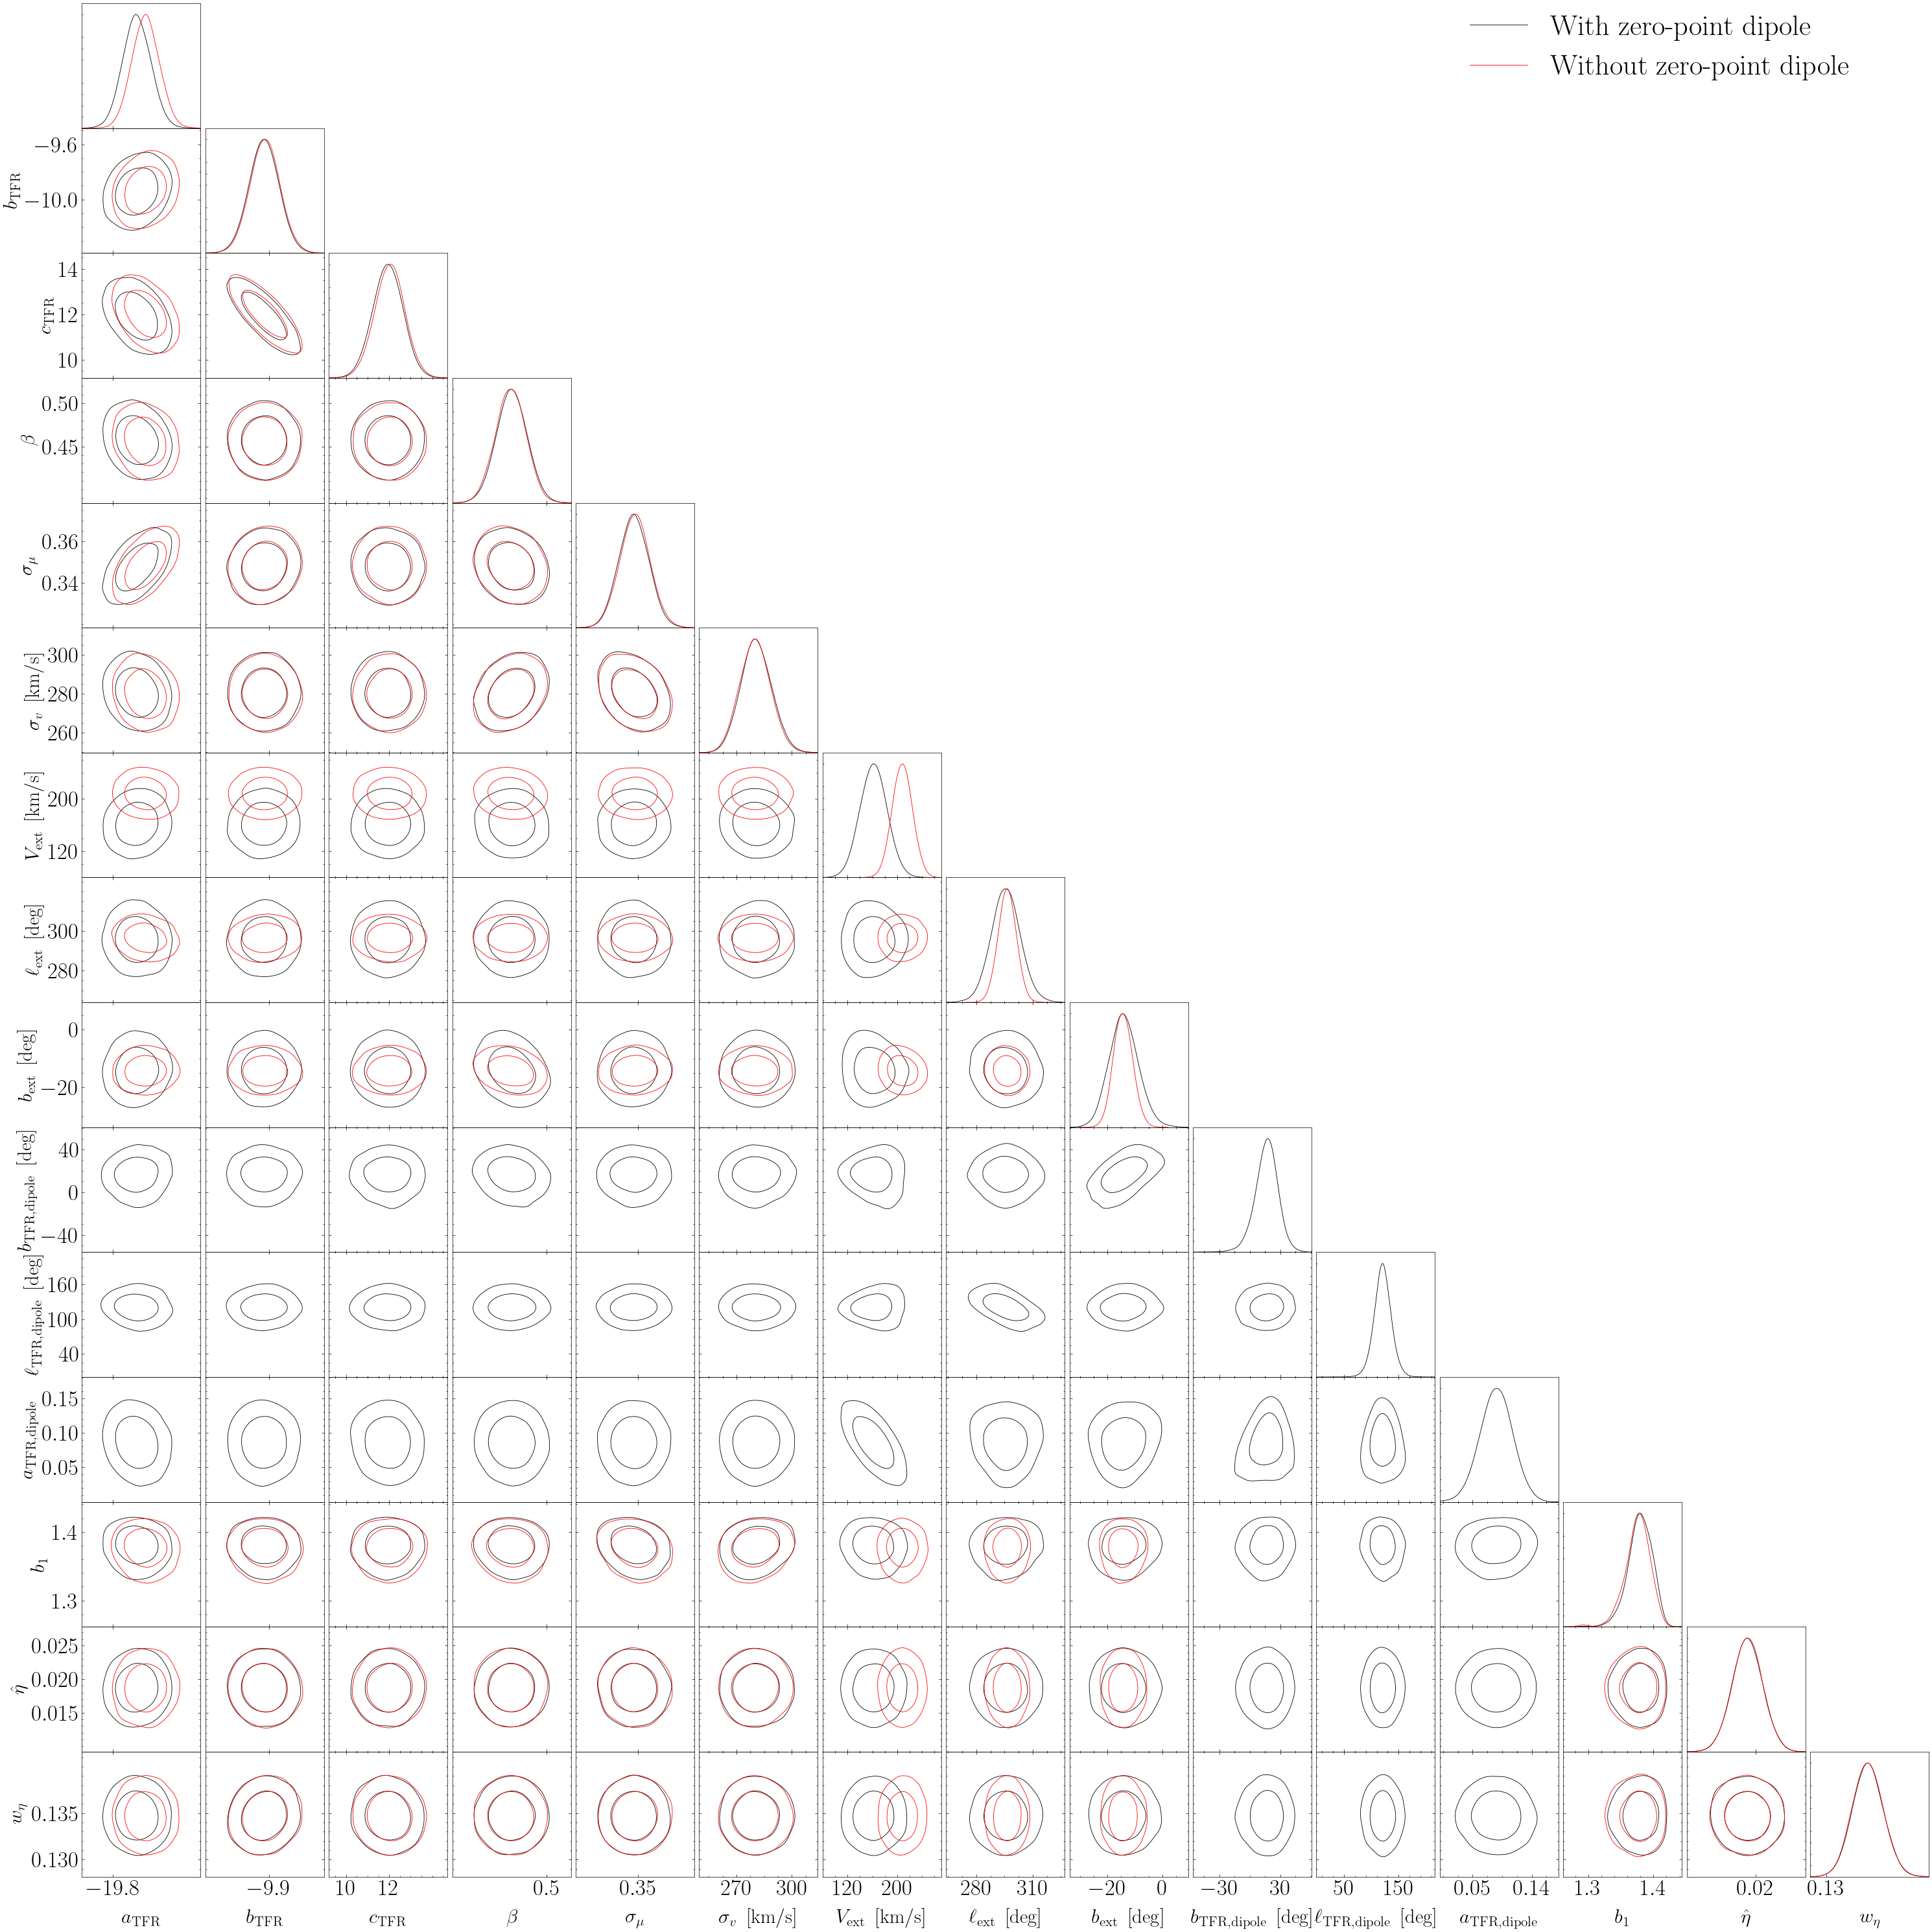

In [32]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=25,
    filled=False,
    labels=["With zero-point dipole", "Without zero-point dipole"],
    keys=None,
    filename="C15_full_posterior.pdf",
    )

### Figure 2: Zoom-in on the magnitude dipole

<unknown>:272: SyntaxWarning: invalid escape sequence '\m'
<unknown>:272: SyntaxWarning: invalid escape sequence '\m'


precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-default.hdf5: R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-CSFD.hdf5: R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR_a

<string>:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2025-06-09 15:09:51 [INFO] Saving GetDist triangle plot to: C15_mag_dipole.pdf


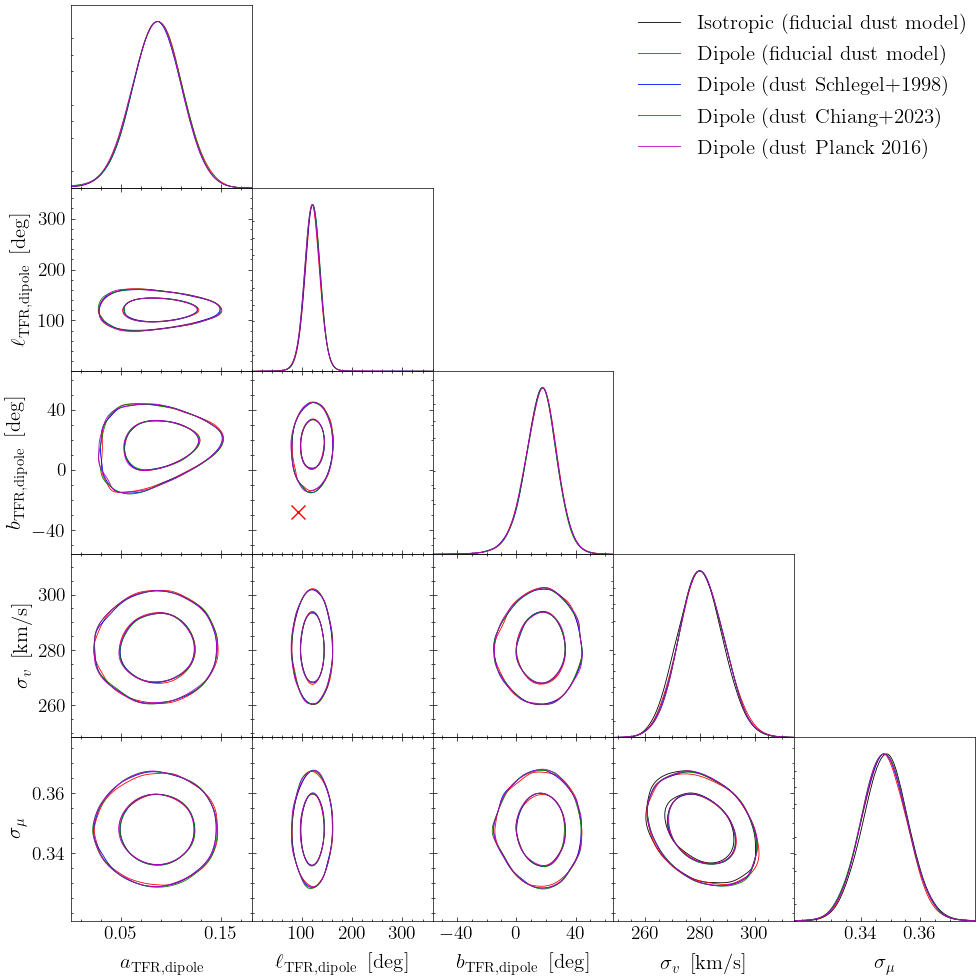

In [24]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-default.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-CSFD.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole_dust-Planck2016.hdf5",
    ]

labels = [
    "Isotropic (fiducial dust model)",
    "Dipole (fiducial dust model)",
    "Dipole (dust Schlegel+1998)",
    "Dipole (dust Chiang+2023)",
    "Dipole (dust Planck 2016)",
    ]

fnames = [join(root, f) for f in fnames]

points = {("a_TFR_dipole_ell", "a_TFR_dipole_b"): (272 - 180, -28)}

plot_corner_from_hdf5(
    fnames,
    fontsize=18,
    filled=False,
    labels=labels,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b", "sigma_v", "sigma_mu",],
    filename="C15_mag_dipole.pdf",
    points=points,
    )

### Figure: Dipole prior dependence

precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipoleUnifComponents.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
Removed no burn in
Removed no burn in
2025-05-29 15:55:19 [INFO] Saving GetDist triangle plot to: dipole_prior_dependence.pdf


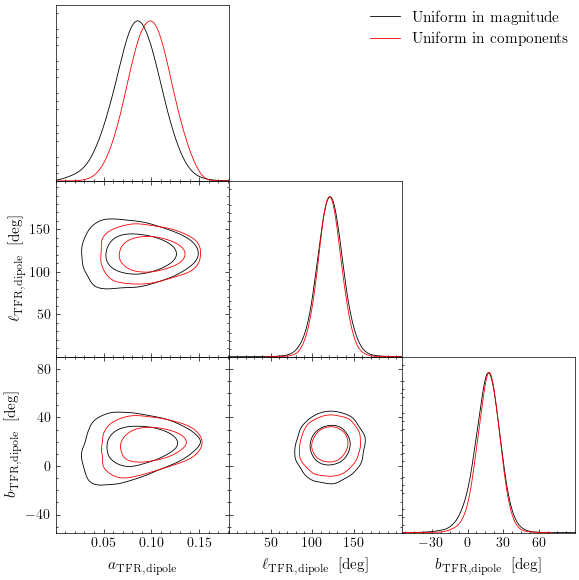

In [46]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipoleUnifComponents.hdf5",
    ]

labels = [
    "Uniform in magnitude",
    "Uniform in components",
    # "Dipole",
    # "Dipole + dust (Schlegel+1998)",
    # "Dipole + dust (Schlafly \& Finkbeiner 2011)",
    # "Dipole + dust (Planck)",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=14,
    filled=False,
    labels=labels,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b",],
    filename="dipole_prior_dependence.pdf",
    )

### Figure: CF4 dipole but without PV corrections

Vext_CF4_W1_noMNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, c_TFR, sigma_mu, sigma_v
Removed no burn in
2025-05-29 13:19:39 [INFO] Saving GetDist triangle plot to: C15_CF4_no_PV.pdf


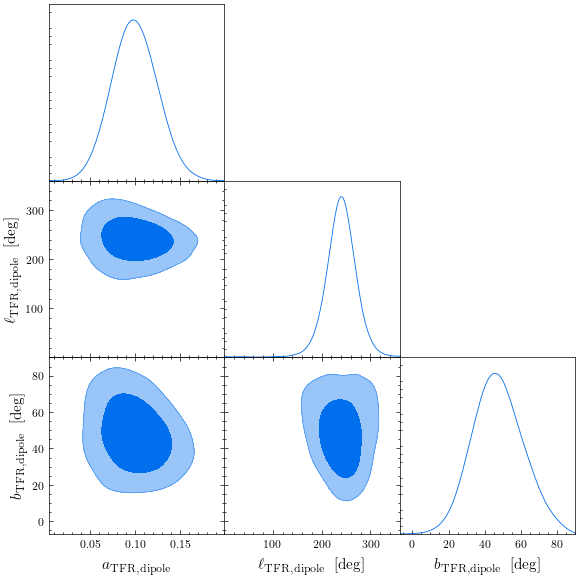

In [27]:
fnames = [
    "Vext_CF4_W1_noMNR_aTFRdipole.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    # fontsize=22,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b",],
    filename="C15_CF4_no_PV.pdf",
    )

### Figure: Pantheon+ dipole

precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5: M, M_dipole_b, M_dipole_ell, M_dipole_mag, Vext, Vext_b, Vext_ell, Vext_mag, b1, beta, mag_latent, sigma_mu, sigma_v
Removed no burn in
2025-05-29 16:31:26 [INFO] Saving GetDist triangle plot to: Pantheon+_dipole.pdf


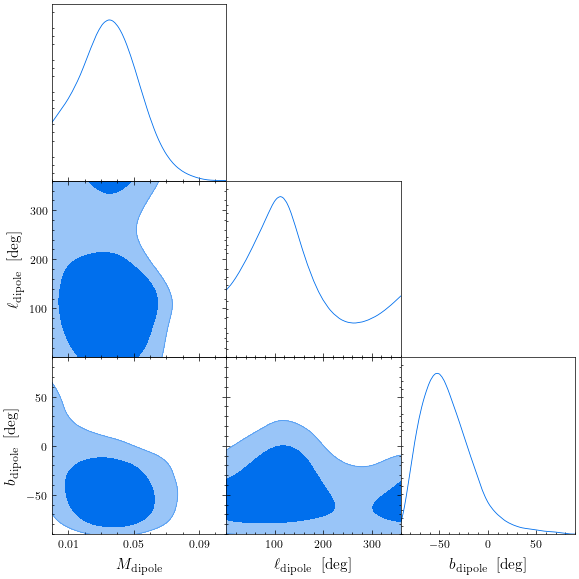

In [50]:
fname = "/Users/rstiskalek/Projects/CANDEL/results/CF4_H0_anisotropy/precomputed_los_Carrick2015_PantheonPlus_MNR_Mdip_prior.hdf5"


keys = ["M_dipole_mag", "M_dipole_ell", "M_dipole_b", ]
plot_corner_from_hdf5(fname, keys=keys, filename="Pantheon+_dipole.pdf", )

### Figure: CF4, 2MTF, SFI++

precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_SFI_MNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, eta_latent, eta_prior_mean, eta_prior_std, mag_latent, sigma_mu, sigma_v
precomputed_los_Carrick2015_2MTF_noMNR_aTFRdipole.hdf5: Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, a_TFR_dipole_b, a_TFR_dipole_ell, a_TFR_dipole_mag, b1, b_TFR, beta, c_TFR, sigma_mu, sigma_v
Removed no burn in
Removed no burn in
Removed no burn in
2025-05-30 11:38:45 [INFO] Saving GetDist triangle plot to: C15_all_TFR.pdf


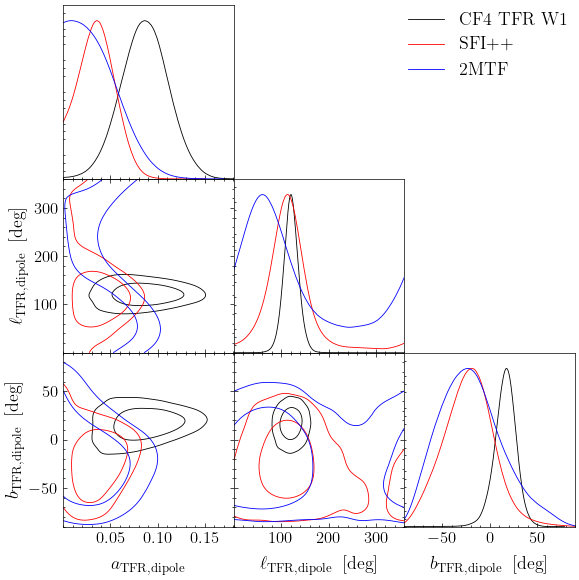

In [26]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_SFI_MNR_aTFRdipole.hdf5",
    "precomputed_los_Carrick2015_2MTF_noMNR_aTFRdipole.hdf5",
    ]

labels = [
    "CF4 TFR W1",
    "SFI++",
    "2MTF",
]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    fontsize=16,
    keys=["a_TFR_dipole_mag", "a_TFR_dipole_ell", "a_TFR_dipole_b",],
    filled=False,
    filename="C15_all_TFR.pdf",
    )

### Figure: Evidence as a function of the sample size

In [20]:
mock_dir = "/Users/rstiskalek/Projects/CANDEL/results/mock_CF4_H0_anisotropy"

records = np.loadtxt("/Users/rstiskalek/Projects/CANDEL/data/CF4_mock/mock_index.txt", dtype=int, comments='#')
indices, nsamples = records[:, 0], records[:, 1]

fnames = [join(mock_dir, f"precomputed_los_Carrick2015_CF4_mock_{i}_noMNR_aTFRdipole.hdf5")
          for i in indices]


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_74178/2261655444.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


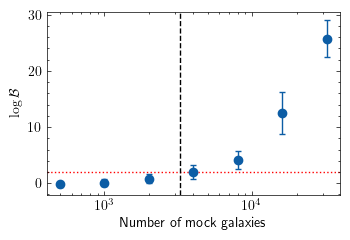

In [28]:
metric = "logZ_harmonic"
with plt.style.context("science"):
    fig, ax = plt.subplots(1, 1, figsize=(3.6, 2.5))
    lw = plt.rcParams["lines.linewidth"]
    unique_ns = np.unique(nsamples)

    means = []
    stds = []
    xticks = []

    gof = [
        compare_zeropoint_dipole_gof(fname, metric, verbose=False)
        for fname in fnames
    ]
    gof = np.asarray(gof)

    for num_samples in unique_ns:
        mask = nsamples == num_samples
        gof_vals = gof[mask]

        if np.sum(np.isfinite(gof_vals)) == 0:
            continue

        mean = np.nanmean(gof_vals)
        std = np.nanstd(gof_vals)
        means.append(mean)
        stds.append(std)
        xticks.append(num_samples)

    ax.errorbar(
        xticks, means, yerr=stds,
        fmt='o', capsize=2, elinewidth=lw, linewidth=lw
    )

    ax.set_xlabel("Number of mock galaxies")
    ax.set_ylabel(r"$\log \mathcal{B}$")
    ax.axhline(2, color="red", linestyle="dotted", lw=lw, zorder=0)

    ax.set_xscale("log")

    if 3250 > min(xticks) and 3250 < max(xticks):
        x_idx = np.interp(3250, xticks, np.arange(len(xticks)))
        ax.axvline(x=3250, c="k", linestyle="dashed", lw=lw, zorder=0)

    fig.tight_layout()
    fig.savefig("evidence_comparison.pdf", dpi=450)
    fig.show()

### Playground

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

fnames = [join(root, f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    keys=["Vext_mag", "Vext_ell", "Vext_b"],
    )